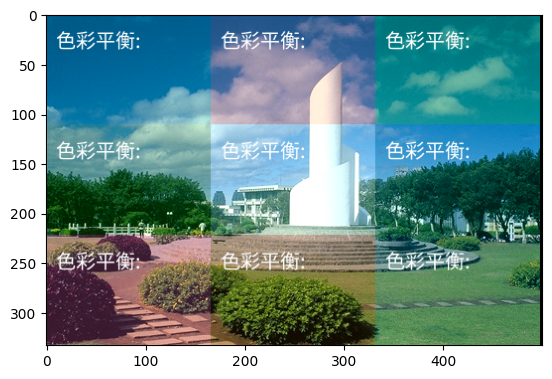

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import random

def colordraw(img, x, y, R, G, B, WordSize, word):
    imgPil = Image.fromarray(img)
    draw = ImageDraw.Draw(imgPil)
    fontpath = 'NotoSansTC-Regular.ttf'
    draw.text((x, y), word, fill=(R, G, B), font=ImageFont.truetype(fontpath, WordSize))
    return np.array(imgPil)  # 轉換回 NumPy array

# 讀取圖片
image = Image.open('Commons.jpeg')

# 使用 PIL Image 來計算寬度和高度
width, height = image.size
n = 3
region_width = width // n
region_height = height // n

# 創建空白圖片，用於還原方格圖片
restored_image = np.zeros((height, width, 3), dtype=np.uint8)

options = ['gamma', '亮度', '銳化', '模糊化', '色彩平衡', '反轉', '旋轉']
choice = input(f"請選擇要調整的項目 ({', '.join(options)})：")

while choice not in options:
    print("請輸入正確的選項")
    choice = input(f"請選擇要調整的項目 ({', '.join(options)})：")

for i in range(n):
    for j in range(n):
        region1 = image.crop((region_width * j, region_height * i, region_width * (j + 1), region_height * (i + 1)))
        
        if choice == 'gamma':
            # 隨機選取對比度
            contrast = random.uniform(0.5, 1.5)
            
            # 調整對比度並保留彩色
            region1 = np.array(region1)
            adjusted = cv2.convertScaleAbs(region1, alpha=1, beta=0)
            adjusted = cv2.cvtColor(adjusted, cv2.COLOR_BGR2HSV)
            adjusted[:, :, 2] = cv2.convertScaleAbs(adjusted[:, :, 2], alpha=contrast, beta=0)
            adjusted = cv2.cvtColor(adjusted, cv2.COLOR_HSV2BGR)
        
        elif choice == '亮度':
            # 隨機選取亮度
            brightness = random.randint(-50, 50)
            
            # 調整亮度
            region1 = np.array(region1)
            adjusted = cv2.convertScaleAbs(region1, alpha=1, beta=brightness)
        
        elif choice == '銳化':
            # 銳化
            kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])
            adjusted = cv2.filter2D(np.array(region1), -1, kernel)
        
        elif choice == '模糊化':
            # 模糊化
            blur_value = random.randint(1, 5) * 2 + 1  # 使用奇數大小的核
            adjusted = cv2.GaussianBlur(np.array(region1), (blur_value, blur_value), 0)
        
        elif choice == '色彩平衡':
            # 色彩平衡調整
            region1 = np.array(region1)
            b, g, r = cv2.split(region1)
            # 增加或減少每個通道的數值
            b = cv2.add(b, random.randint(-50, 50))
            g = cv2.add(g, random.randint(-50, 50))
            r = cv2.add(r, random.randint(-50, 50))
            adjusted = cv2.merge((b, g, r))
        
        elif choice == '反轉':
            # 反轉影像
            adjusted = cv2.flip(np.array(region1), -1)
        
        elif choice == '旋轉':
            # 旋轉影像
            angle = random.choice([90, 180, 270])
            rotation_matrix = cv2.getRotationMatrix2D((region_width / 2, region_height / 2), angle, 1)
            adjusted = cv2.warpAffine(np.array(region1), rotation_matrix, (region_width, region_height))
        
        # 使用 colordraw 加上參數值
        param_text = f"{choice.capitalize()}: {contrast if choice == 'gamma' else brightness if choice == '亮度' else ''}"
        region1_with_text = colordraw(adjusted, 10, 10, 255, 255, 255, 20, param_text)
        
        restored_image[region_height * i:region_height * (i + 1), region_width * j:region_width * (j + 1)] = region1_with_text

# 顯示還原的方格圖片
plt.imshow(restored_image)
plt.show()
